# Set up enviroment

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Start

In [ ]:
from sklearn.linear_model import LinearRegression

def buildModel():
  model = LinearRegression()
  return model

## Reading dataset

In [ ]:
dataset_path = '/content/drive/MyDrive/UIT/IS403/Source_Code_PTDLKD/Data Train 1-3-2019 1-3-2024/BIDV.csv'
df = pd.read_csv(dataset_path, index_col="Date")


In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
3/1/2019,23001.22852,23354.00781,23001.22852,23177.61914,23177.61914,1634348
3/4/2019,23354.00781,23812.62109,23283.45313,23706.78906,23706.78906,1375277
3/5/2019,23424.56445,24906.23828,23424.56445,24412.34766,24412.34766,5974891
3/6/2019,24412.34766,24624.01563,24271.23633,24518.18164,24518.18164,2411789
3/7/2019,24694.57031,24870.96094,24482.90234,24624.01563,24624.01563,2413192
3/8/2019,24306.51367,24482.90234,23918.45508,23989.01172,23989.01172,2563866
3/11/2019,24059.56836,24059.56836,23600.95508,23742.06641,23742.06641,1611841
3/12/2019,24059.56836,25047.34961,23847.90039,25047.34961,25047.34961,2395971
3/13/2019,24906.23828,25364.85156,24835.68359,25117.90625,25117.90625,4054826


In [ ]:
print(f"Data shape: {df.shape}")

Data shape: (1251, 6)


## Data preprocessing

### Checking duplicates and null values

In [ ]:
print("Duplicated")
df.duplicated().sum()

Duplicated


0

In [ ]:
print("Null")
df.isnull().sum()

Null


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Checking DataFrame information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1251 entries, 3/1/2019 to 3/1/2024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1251 non-null   float64
 1   High       1251 non-null   float64
 2   Low        1251 non-null   float64
 3   Close      1251 non-null   float64
 4   Adj Close  1251 non-null   float64
 5   Volume     1251 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.4+ KB


### Overview Data Descriptive statistic

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1251.000000,1251.000000,1251.000000,1251.000000,1251.000000,1.251000e+03
mean,32478.152436,32953.583896,32049.788025,32488.866039,32488.866039,2.259783e+06
std,6070.015773,6142.073892,6005.553272,6074.542780,6074.542780,1.666240e+06
min,21590.111330,22225.113280,20813.996090,21590.111330,21590.111330,1.837970e+05
25%,28222.367190,28610.423830,27922.503905,28222.367190,28222.367190,1.163729e+06
50%,31044.603520,31432.660160,30437.482420,31009.326170,31009.326170,1.789686e+06
75%,37447.867190,37935.931640,36871.062500,37381.310545,37381.310545,2.805575e+06
max,53900.000000,54800.000000,53000.000000,53900.000000,53900.000000,1.846408e+07


## Linear Regression Model

### Split Data

In [ ]:
df.reset_index(inplace=True)

features = df.index
target = df['Close']

def splitTrainTest(test_ratio):
    n_observations = len(df)

    train_size = int((1-test_ratio) * n_observations)
    test_size = n_observations - train_size

    x_train, x_test = (
        np.array(features[:train_size]).reshape(-1, 1),
        np.array(features[train_size:train_size + test_size]).reshape(-1, 1)
    )
    y_train, y_test = target[:train_size], target[train_size:train_size + test_size]

    return x_train, x_test, y_train, y_test

In [ ]:
def makePlots(data):
    (test_ratio, x_train, y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days) = data

    figname = f'BIDV__{int(10-test_ratio*10)}-{int(test_ratio*10)}'
    plt.title(figname)
    plt.xlabel('Index')
    plt.ylabel('Price')

    # train
    plt.plot(x_train, y_train)

    # test
    plt.plot(x_test, y_test)
    plt.plot(x_test, y_pred)

    # next 30 days
    plt.plot(x_next_30_days, y_next_30_days)

    # save plots and show
    plt.legend(['Train', 'Test', 'Predictions (Test)','Predictions (Next30Days)'])
    # plt.savefig("plots/%s.png" % figname,bbox_inches='tight')
    plt.show()

In [ ]:
def evaluateAccuracy(y_test, y_pred):
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    print('Testing MAPE:', test_mape)

    test_mae = np.mean(abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

In [ ]:
# train:test 9:1 8:2 7:3
test_ratio = 0.3

print("==============================")
print('Test Ratio: ', test_ratio)

#====Start-Linear-Regression-model====#
# split train test by test_ratio
x_train, x_test, y_train, y_test= splitTrainTest(test_ratio)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)

# create linear regression model
model = buildModel()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)

# compare actual and predicted price
comparison_data = {'Actual_Price':y_test, 'Predicted_Price':y_pred}
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

# evaluate accuracy
evaluateAccuracy(y_test, y_pred)
#====End-Linear-Regression-model====#



#====Start-Predick-next-30-days====#
print("==============================")
last_index =  df.index[-1]
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
print("Next 30 Days:")
print(y_next_30_days)
#====End-Predick-next-30-days====#

Test Ratio:  0.3
Train:  (875, 1)
Test:  (376, 1)
      Actual_Price  Predicted_Price
875    34963.17188     34234.224792
876    34608.21875     34244.365530
877    35318.12891     34254.506268
878    35495.60547     34264.647005
879    35051.91406     34274.787743
...            ...              ...
1246   53600.00000     37996.438489
1247   53000.00000     38006.579227
1248   53900.00000     38016.719964
1249   53000.00000     38026.860702
1250   53500.00000     38037.001440

[376 rows x 2 columns]
Testing RMSE: 5048.021296001122
Testing MAPE: 0.10329444999089575
Testing MAE: 4097.113550490695
Next 30 Days:
[38047.14217751 38057.28291523 38067.42365296 38077.56439069
 38087.70512841 38097.84586614 38107.98660387 38118.12734159
 38128.26807932 38138.40881705 38148.54955477 38158.6902925
 38168.83103023 38178.97176796 38189.11250568 38199.25324341
 38209.39398114 38219.53471886 38229.67545659 38239.81619432
 38249.95693204 38260.09766977 38270.2384075  38280.37914522
 38290.51988295 38

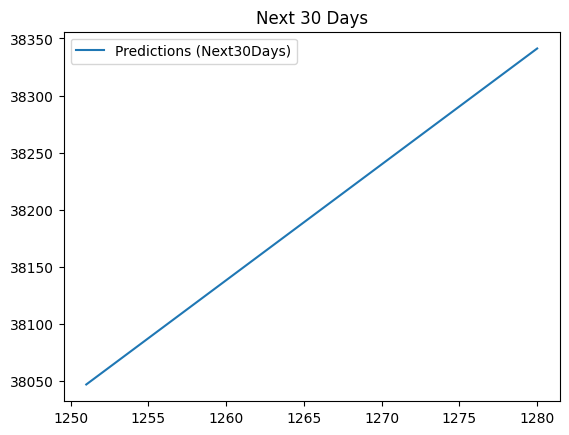

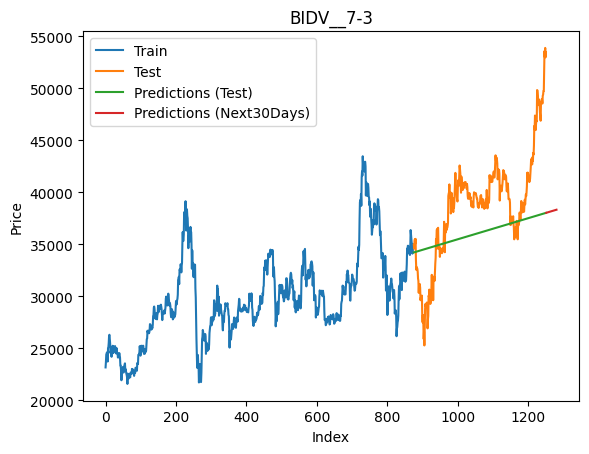

In [ ]:
# use plots to display data
# next 30 days
plt.title("Next 30 Days")
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Predictions (Next30Days)'])
plt.show()
# all
makePlots((test_ratio, x_train , y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days))